# Titanic Data set
From Kaggle Titanic - ML from Disaster competition

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics


Data dictionary

Variable	Definition	Key
survival	Survival	0 = No, 1 = Yes
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd


sex	Sex	
Age	Age in years	
sibsp	# of siblings / spouses aboard the Titanic	
parch	# of parents / children aboard the Titanic	
ticket	Ticket number	
fare	Passenger fare	
cabin	Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton


pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

# Import and characterize dataset

In [2]:
# import the training and testing data set

filename = 'train.csv'

train_df = pd.read_csv(filename)

filename2 = 'test.csv'

test_df = pd.read_csv(filename2)


In [3]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
train_df.shape

(891, 12)

In [5]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Explore basic percentages and visuallization of datset

In [6]:
# look at some simple percentages first

women = train_df.loc[train_df.Sex == 'female']['Survived']
rate_women = sum(women)/len(women)

print('% of women who survived:', rate_women)

% of women who survived: 0.7420382165605095


In [7]:
men = train_df.loc[train_df.Sex == 'male']['Survived']
rate_men = sum(men)/len(men)

print('% of men who survived:', rate_men)

% of men who survived: 0.18890814558058924


In [8]:
# check embarked location: C, Q, S

C_status = train_df.loc[train_df.Embarked == 'C']['Survived']
rate_C = sum(C_status)/len(C_status)

Q_status = train_df.loc[train_df.Embarked == 'Q']['Survived']
rate_Q = sum(Q_status)/len(Q_status)

S_status = train_df.loc[train_df.Embarked == 'S']['Survived']
rate_S = sum(S_status)/len(S_status)

print('% from C who survived:', rate_C)
print('% from Q who survived:', rate_Q)
print('% from S who survived:', rate_S)



% from C who survived: 0.5535714285714286
% from Q who survived: 0.38961038961038963
% from S who survived: 0.33695652173913043


In [9]:
# check P class: 1, 2, 3

status1 = train_df.loc[train_df.Pclass == 1]['Survived']
rate_1 = sum(status1)/len(status1)

    
status2 = train_df.loc[train_df.Pclass == 2]['Survived']
rate_2 = sum(status2)/len(status2)

status3 = train_df.loc[train_df.Pclass == 3]['Survived']
rate_3 = sum(status3)/len(status3)

print('% from 1 who survived:', rate_1)
print('% from 2 who survived:', rate_2)
print('% from 3 who survived:', rate_3)

% from 1 who survived: 0.6296296296296297
% from 2 who survived: 0.47282608695652173
% from 3 who survived: 0.24236252545824846


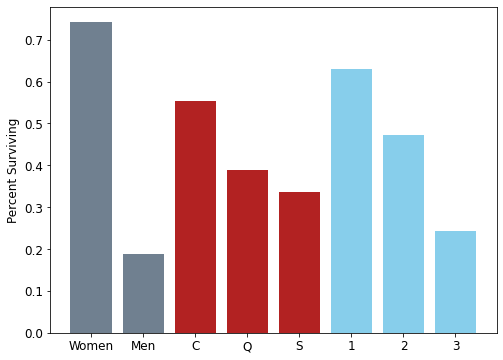

In [10]:
# Plot some percentages

labels = ['Women', 'Men', 'C', 'Q', 'S', '1', '2', '3']
percentages = [rate_women, rate_men, rate_C, rate_Q, rate_S, rate_1, rate_2, rate_3]
bar_color = ['slategray', 'slategray', 'firebrick', 'firebrick', 'firebrick', 'skyblue', 'skyblue', 'skyblue']

plt.figure(figsize=(8,6))
plt.bar(labels,percentages,color = bar_color)
plt.ylabel('Percent Surviving',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Break into training and validation data and run fandom forest classifier

In [11]:
# Break training data into testing and training sets so we can test a random forest classifier

# The columns we care about are Pclass[2], Sec[4], Age[5], SibSp[6], Parch[7], Fare[8], Embarked[10]
# The column we want to predict is Survived [1]


Y = train_df['Survived']

####
# Age column is throwing nans, need to sort out why
####

features = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = pd.get_dummies(train_df[features])
#X_test = pd.get_dummies(test_df[features])


X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size = 0.20, random_state = 1)





In [19]:
#print(X_train[X_train.isnull().any(axis=1)])
print(X)

     Pclass  SibSp  Parch     Fare  Sex_female  Sex_male  Embarked_C  \
0         3      1      0   7.2500           0         1           0   
1         1      1      0  71.2833           1         0           1   
2         3      0      0   7.9250           1         0           0   
3         1      1      0  53.1000           1         0           0   
4         3      0      0   8.0500           0         1           0   
..      ...    ...    ...      ...         ...       ...         ...   
886       2      0      0  13.0000           0         1           0   
887       1      0      0  30.0000           1         0           0   
888       3      1      2  23.4500           1         0           0   
889       1      0      0  30.0000           0         1           1   
890       3      0      0   7.7500           0         1           0   

     Embarked_Q  Embarked_S  
0             0           1  
1             0           0  
2             0           1  
3             0

In [13]:
# Run a random forest classifier

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X_train,Y_train)
predictions = model.predict(X_validation)

In [18]:
# check these predictions
# have 891 rows for people on boat
# test size is 20 percent, or 178

print(metrics.accuracy_score(Y_validation, predictions))

#print(metrics.classification_report(Y_validation, predictions))
print(metrics.confusion_matrix(Y_validation , predictions))

0.776536312849162
[[98  8]
 [32 41]]


In [22]:
print(type(X))

<class 'pandas.core.frame.DataFrame'>


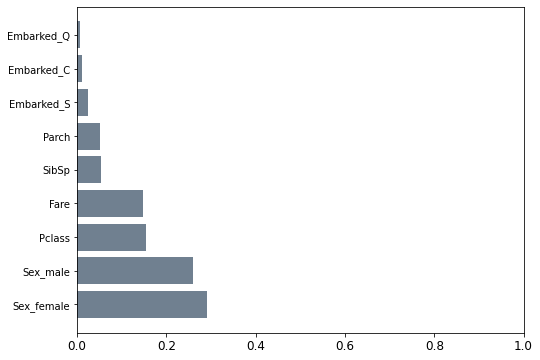

In [48]:
# visualize the importance of different features
feature_imp = pd.Series(model.feature_importances_,index=X.columns).sort_values(ascending=False)
#print(feature_imp[:])

plt.figure(figsize=(8,6))
plt.barh(feature_imp.index,feature_imp[:],color = 'slategray', align='center')
plt.xlim((0,1))
plt.xticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()

In [24]:
# Run a random forest classifier

y = train_df['Survived']

features = ['Pclass', 'Sex', 'SibSp', 'Parch']
X = pd.get_dummies(train_df[features])
X_test = pd.get_dummies(test_df[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X,y)
predictions = model.predict(X_test)

In [25]:
print(X)

     Pclass  SibSp  Parch  Sex_female  Sex_male
0         3      1      0           0         1
1         1      1      0           1         0
2         3      0      0           1         0
3         1      1      0           1         0
4         3      0      0           0         1
..      ...    ...    ...         ...       ...
886       2      0      0           0         1
887       1      0      0           1         0
888       3      1      2           1         0
889       1      0      0           0         1
890       3      0      0           0         1

[891 rows x 5 columns]
